# CAN Self-Driving Car Experiments

## 0. Initalize Setting

```python
distance_2_tangent: 20
angle_at_tangent: 0.4
```

53px ~ 12.5cm
1px ~ 0.2358 cm
1 ts = 0.2s

In [1]:
import matplotlib.pyplot as plt
import numpy as np

TIME_CONVERTER = 0.2
DIS_CONVERTER = 0.2358

## 1. P-Controller

In [2]:
# record loading
dis_rec_list = np.zeros((10, 200))
for i in range(10):
    cur_rec = np.load('./p-controller/record-' + str(i+1) + '.npy')
    dis_rec_list[i] = cur_rec[:200, 0]

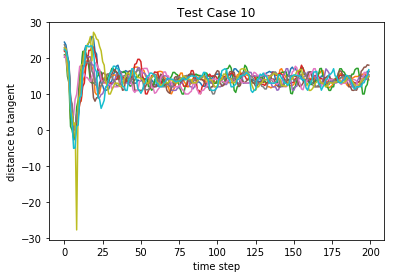

In [3]:
for i, rec in enumerate(dis_rec_list):
    plt.plot(rec)
    plt.title('Test Case ' + str(i+1))
    plt.xlabel('time step')
    plt.ylabel('distance to tangent')
#     plt.show()

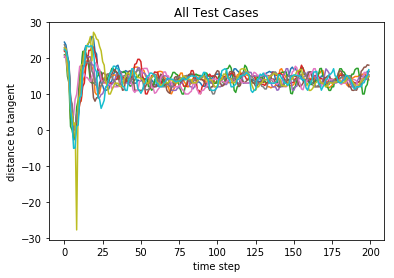

In [4]:
plt.figure(0)
for rec in dis_rec_list:
    plt.title('All Test Cases')
    plt.xlabel('time step')
    plt.ylabel('distance to tangent')
    plt.plot(rec)

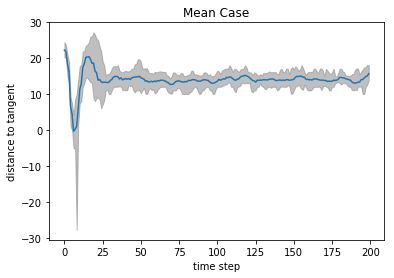

In [36]:
dis_mean_list = np.mean(dis_rec_list, axis=0)
dis_max_list = np.max(dis_rec_list, axis=0)
dis_min_list = np.min(dis_rec_list, axis=0)
plt.title('Mean Case')
plt.xlabel('time step')
plt.ylabel('distance to tangent')
plt.plot(dis_mean_list)

plt.fill_between(x, dis_max_list, dis_min_list, color='grey', alpha='0.5')

***

## 2. PI-Controller

In [6]:
dis_rec_pi_list = np.zeros((10, 200))
for i in range(10):
    cur_rec = np.load('./pi-controller/record-pi-' + str(i+1) + '.npy')
    dis_rec_pi_list[i] = cur_rec[:200, 0]

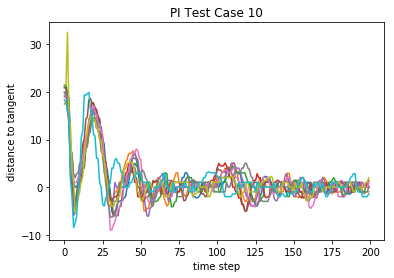

In [7]:
for i, rec in enumerate(dis_rec_pi_list):
    plt.plot(rec)
    plt.title('PI Test Case ' + str(i+1))
    plt.xlabel('time step')
    plt.ylabel('distance to tangent')
#     plt.show()

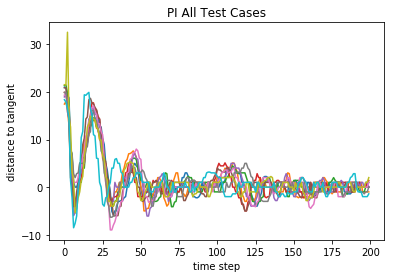

In [31]:
plt.figure(1)
for rec in dis_rec_pi_list:
    plt.title('PI All Test Cases')
    plt.xlabel('time step')
    plt.ylabel('distance to tangent')
    plt.plot(rec)

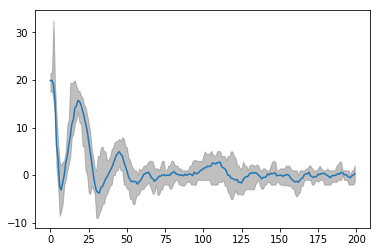

In [29]:
dis_mean_pi = np.mean(dis_rec_pi_list, axis=0)
dis_max_pi = np.max(dis_rec_pi_list, axis=0)
dis_min_pi = np.min(dis_rec_pi_list, axis=0)

# Plot lines
x = np.arange(0, 200, 1)
mean_line, = plt.plot(x, dis_mean_pi, label='mean')
# max_line, = plt.plot(x, dis_max_pi, label='max')
# min_line, = plt.plot(x, dis_min_pi, label='min')

# plt.legend(handles=[mean_line, max_line, min_line])
plt.fill_between(x, dis_max_pi, dis_min_pi, color='grey', alpha='0.5')

***
## 3. Comparison

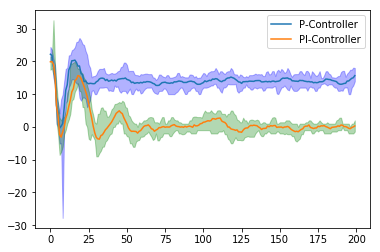

In [40]:
plt.figure(2)
p_line, = plt.plot(dis_mean_list, label='P-Controller')
pi_line, = plt.plot(dis_mean_pi, label='PI-Controller')
plt.legend(handles=[p_line, pi_line])

plt.fill_between(x, dis_max_list, dis_min_list, color='blue', alpha='0.3')
plt.fill_between(x, dis_max_pi, dis_min_pi, color='green', alpha='0.3')

## 4. Learning Process

## 4.1 PI Conrtoller: Performance through time 

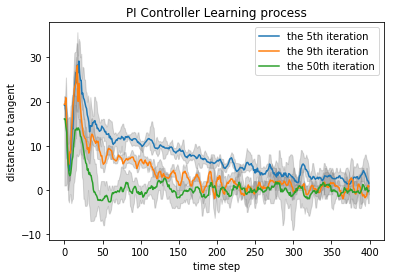

In [24]:
its = [5, 9, 50]
l = [None, None, None]
plt.figure(10)
plt.title('PI Controller Learning process')
plt.xlabel('time step')
plt.ylabel('distance to tangent')
for inx, i in enumerate(its):
    rec_list = np.zeros((5, 400))
    for t in range(5):
        rec = np.load('./learning-process/pi-it-' + str(i) + '-' + str(t+1) + '.npy')
        rec_list[t] = rec[:400, 0]
    l[inx], = plt.plot(np.mean(rec_list, axis=0), label='the ' + str(i) + 'th iteration')
    rec_max = np.max(rec_list, axis=0)
    rec_min = np.min(rec_list, axis=0)
    plt.fill_between(np.arange(400), rec_max, rec_min, color='grey', alpha='0.3')
plt.legend(handles=[l[0], l[1], l[2]])